In [2]:
cd Measurement-automation/

/home/gleb/Документы/Science/Статьи/Machine vision/Measurement-automation


In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import matplotlib.patches as patches
from matplotlib import ticker, colorbar as clb

%cd .. 
from parula import *
%cd Measurement-automation/

from importlib import reload
from resonator_tools.circuit import notch_port

import scipy
from scipy.signal import correlate, find_peaks
from scipy.optimize import *

rc("font", **{"size":14})

mpl.rcParams['grid.color'] = 'k'
mpl.rcParams['grid.linestyle'] = ':'
mpl.rcParams['grid.linewidth'] = 0.5

%load_ext snakeviz

import lib2

from lib2.MeasurementResult import *

/home/gleb/Документы/Science/Статьи/Machine vision
/home/gleb/Документы/Science/Статьи/Machine vision/Measurement-automation


In [5]:
# reload(lib2.ResonatorDetector)
# reload(lib2.fulaut.AnticrossingOracle)
from lib2.fulaut.AnticrossingOracle import AnticrossingOracle

In [6]:
# reload(lib2.fulaut.SpectrumOracle)
from lib2.fulaut.SpectrumOracle import *

In [ ]:
samples = {"Xmon MIPT Al asym anneal":
               {"II":[[1,3], [[3], [5]]],
                "III":[[2], [3, 4]],
                "VI":[[0,1], [[0, 3], [8]]]},
           "BMSTU Clean 3":
               {"I":[[0], [0]]},
           "Xmon BMSTU 1806-176-1":
               {"I":[[0], [8]],
                "II":[[0], [1]],
                "VI":[[3], [7]]},
           "Xmon-043-3":
               {"II":[[0], [0]],
                "VI":[[0], [0]]},
           "Xmon 258 Si 111":
               {"I":[[0],[0]],
                "V":[[0],[1]]},
           "Xmon BMSTU assym 1804-108-2":
               {"V":[[0],[0]]},
           "Xmon MIPT Al asym NO anneal":
               {"VI":[[1],[1]]}
          }

In [ ]:
for sample_name, measurements in samples.items():
    for qubit_name, data_ordinals in measurements.items():
        for idx, sts_id in enumerate(data_ordinals[0]):
            if len(data_ordinals[0]) > 1:
                two_tone_ids = data_ordinals[1][idx]
            else:
                two_tone_ids = data_ordinals[1]
                
            for two_tone_id in two_tone_ids:
                print(sample_name, qubit_name, sts_id, two_tone_id)
                anti = MeasurementResult.load(sample_name, 
                                              "%s-anticrossing"%qubit_name, 
                                              return_all=True)[sts_id]
                twotone = MeasurementResult.load(sample_name, 
                                                 "%s-two-tone"%qubit_name,
                                                  return_all=True)[two_tone_id]
                
                ao = AnticrossingOracle("transmon", anti, plot=False, fast_res_detect=True, hints=[])
                result = ao.launch()
                if result[0][1] > 50e6 and result[0][3]<4e9:
                    ao = AnticrossingOracle("transmon", anti, plot=False, fast_res_detect=True, hints=["fqmax_above"])
                    result = ao.launch()
                    
                so = SpectrumOracle("transmon", twotone, result[0][2:], plot=True)
                so.launch()
                plt.savefig("../SO test/"+str((sample_name, qubit_name, sts_id, two_tone_id))+".png")

6.5714e+09, 3.6000e+07, 1.2750e-04, -5.8546e-05, 7.8000e+09, 4.0000e-01 loss: 1.29 MHz


In [7]:
sample_name = "Xmon BMSTU assym 1804-108-2"
sample_name = "Xmon MIPT Al asym NO anneal"
sample_name = "Xmon MIPT Al asym anneal"
# sample_name = "BMSTU Clean 3"
# sample_name = "Xmon-043-3"
qubit_name = "II"
# anti = MeasurementResult.load("Xmon MIPT Al asym anneal", "VI-anticrossing")
# twotone = MeasurementResult.load("Xmon MIPT Al asym anneal", "VI-two-tone")
anti = MeasurementResult.load(sample_name, "%s-anticrossing"%qubit_name)
twotone = MeasurementResult.load(sample_name, "%s-two-tone"%qubit_name)

0 data/Xmon MIPT Al asym anneal/Mar 12 2018/16-32-15 - II-anticrossing/II-anticrossing.pkl
1 data/Xmon MIPT Al asym anneal/Mar 12 2018/16-48-45 - II-anticrossing/II-anticrossing.pkl
2 data/Xmon MIPT Al asym anneal/Mar 28 2018/12-53-05 - II-anticrossing/II-anticrossing.pkl
3 data/Xmon MIPT Al asym anneal/Mar 28 2018/14-25-37 - II-anticrossing/II-anticrossing.pkl
More than one file found. Enter an index from listed above:
1
0 data/Xmon MIPT Al asym anneal/Mar 12 2018/18-15-16 - II-two-tone/II-two-tone.pkl
1 data/Xmon MIPT Al asym anneal/Mar 12 2018/18-33-28 - II-two-tone/II-two-tone.pkl
2 data/Xmon MIPT Al asym anneal/Mar 12 2018/19-29-23 - II-two-tone/II-two-tone.pkl
3 data/Xmon MIPT Al asym anneal/Mar 12 2018/20-59-12 - II-two-tone/II-two-tone.pkl
4 data/Xmon MIPT Al asym anneal/Mar 28 2018/15-18-30 - II-two-tone/II-two-tone.pkl
5 data/Xmon MIPT Al asym anneal/Mar 28 2018/15-55-12 - II-two-tone/II-two-tone.pkl
6 data/Xmon MIPT Al asym anneal/Mar 28 2018/19-37-09 - II-two-tone/II-two-to

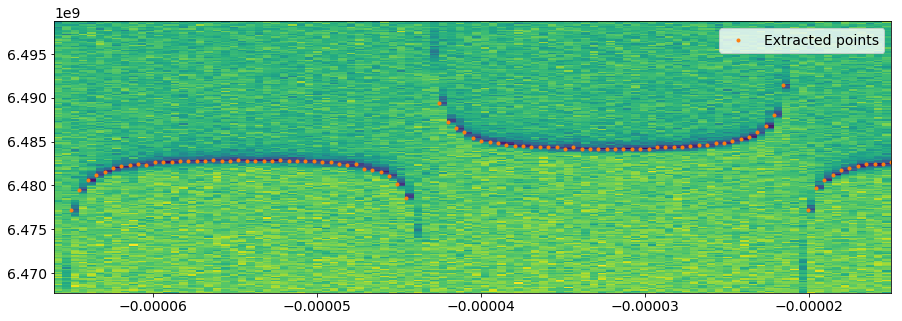

In [8]:
ao = AnticrossingOracle("transmon", anti, plot=True, fast_res_detect=True, hints=[])

6.4839e+09, 3.5140e+07, 4.4860e-05, -9.7818e-06, 7.6924e+09, 5.6698e-02 loss: 0.08 MHz


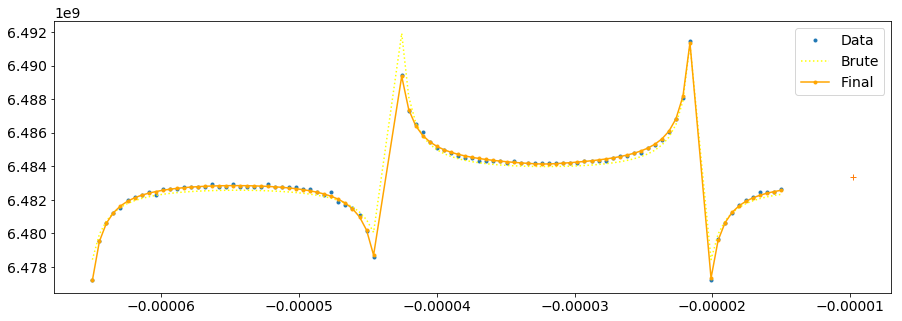

In [9]:
result = ao.launch()

'FigureManagerBase' object has no attribute 'window'


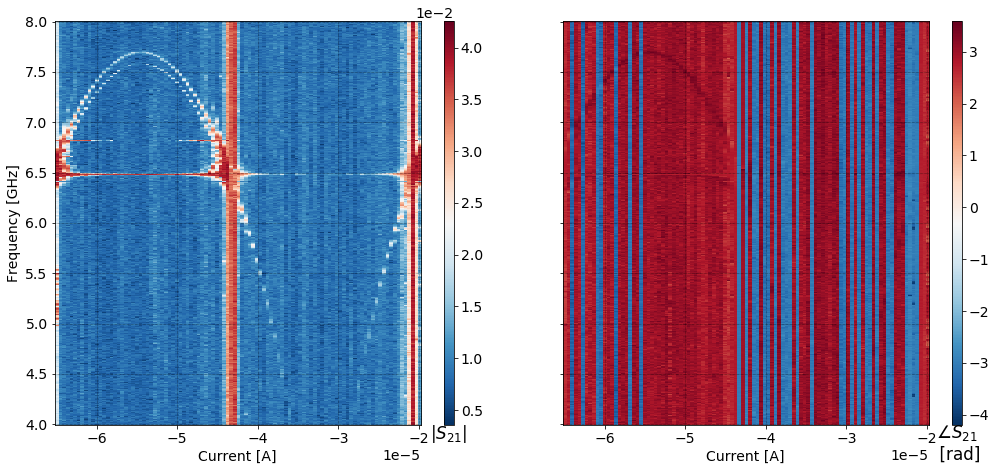

In [14]:
try:
    twotone.visualize()
except Exception as e:
    print(e)

In [21]:
reload(lib2.fulaut.SpectrumOracle)
from lib2.fulaut.SpectrumOracle import *

-4.3188917525773194e-05 -1.0


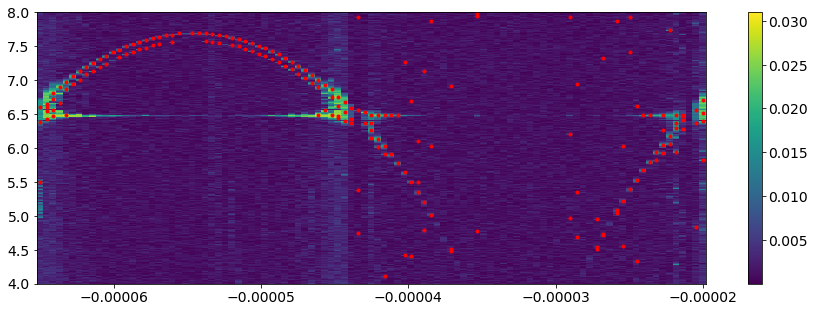

In [126]:
sp = SpectrumOracle("transmon", twotone, result[0][2:], True)
# sp._extract_data(True)

Done: 100%, polishing..., [4.472e-05, -5.453e-05, 7.691e+00, 5.405e-02, 1.129e-01]

array([ 4.47169928e-05, -5.45330922e-05,  7.69139184e+09,  5.40446707e-02,
        1.12903949e-01])

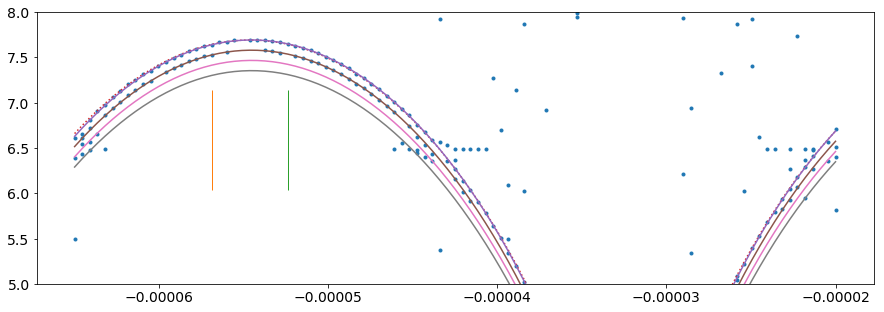

In [129]:
opt_params = sp.launch()
plt.ylim(5,8)
opt_params

## General two-tone plot

In [1]:

plt.subplot2grid((2,1), (0,0))

curs_sts, S21s_sts, freqs_sts  = anti.get_data().values()

m1 = pcolormesh(curs_sts/1e-6, freqs_sts/1e9, abs(S21s_sts.T)/np.max(abs(S21s_sts)),
                cmap="Spectral_r", rasterized=True)
ax1 = gca()

plt.xlim(-65, -20)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10))


gca().set_xticklabels([])
plt.ylabel("$f_{p}$ [GHz]")

plt.text(-72.5, 6.5, "(a)", fontdict={"name":"STIX"}, fontsize=22)

plt.grid()

plt.subplot2grid((2,1), (1,0))

curs, freqs, S21s = twotone.get_data().values()

dx = curs[1]-curs[0]
x = concatenate((curs-dx/2, [curs[-1]+dx/2]))
dy = freqs[1]-freqs[0]
y = concatenate((freqs-dy/2, [freqs[-1]+dx/2]))

pcolormesh(x, y/1e9, abs(S21s).T/np.max(abs(S21s)), cmap="Spectral_r", rasterized=True)

plt.gca().xaxis.set_major_formatter(ticker.EngFormatter("A"))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10e-6))
plt.xlim(-65e-6, -20e-6)
plt.xlabel("Coil current")

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(0.75))
plt.ylim(5, 8)
plt.ylabel("$f_{exc}$ [GHz]")

plt.grid()

plt.text(-72.5e-6, 8, "(b)", fontdict={"name":"STIX"}, fontsize=22)


plt.gcf().set_size_inches(7,6)

plt.tight_layout()

caxes = clb.make_axes(ax1, location="top", shrink=0.875, aspect=50, pad=0.175, anchor=(0,0))[0]
# plt.colorbar(cax = caxes)
cb = plt.colorbar(m1, orientation="horizontal", cax=caxes)
loc = ticker.MultipleLocator(base=0.5) # this locator puts ticks at regular intervals
cb.locator = loc
cb.set_ticks([0.05, 0.5, 1])
cb.update_ticks()
cb.ax.set_title(r"$|S_{21}|$", position=(1.1,-1.5), fontsize=15)

# plt.savefig("../Pictures/twotone.pdf", bbox_inches="tight", dpi=300)

NameError: name 'plt' is not defined

## Point extraction

In [ ]:
sp = SpectrumOracle("transmon", twotone, result[0][2:], False)

curs, freqs, S21s = twotone.get_data().values()

dx = curs[1]-curs[0]
x = concatenate((curs-dx/2, [curs[-1]+dx/2]))
dy = freqs[1]-freqs[0]
y = concatenate((freqs-dy/2, [freqs[-1]+dx/2]))

pcolormesh(x, y/1e9, abs(sp._Z.T)/np.max(abs(sp._Z)), cmap="Spectral_r", rasterized=True, vmin=0)

plt.gca().xaxis.set_major_formatter(ticker.EngFormatter("A"))
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(10e-6))
plt.xlim(-65e-6, -20e-6)
plt.xlabel("Coil current")

plt.gca().yaxis.set_major_locator(ticker.MultipleLocator(1.5))
plt.ylim(5, 8)
plt.ylabel("$f_{exc}$ [GHz]")

plt.grid()

plt.plot(sp._points[:,0], sp._points[:,1], linestyle="", ms=4, color="black", marker=".", markeredgewidth=0.5)

plt.gcf().set_size_inches(7,4)

caxes = clb.make_axes(gca(), location="top", shrink=0.7, aspect=40, pad=0.125, anchor=(0,0))[0]
# plt.colorbar(cax = caxes)
cb = plt.colorbar(orientation="horizontal", cax=caxes)
loc = ticker.MultipleLocator(base=0.5) # this locator puts ticks at regular intervals
cb.locator = loc
cb.update_ticks()
cb.ax.set_title(r"$|S_{21} - \langle S_{21}\rangle_{f_{exc}}|$", position=(1.25,-1.75), fontsize=15)

# plt.savefig("../Pictures/extract_points.pdf", bbox_inches="tight", dpi=300)


In [1545]:
mgrid[sp._slices[1]]

array([-7.07645310e-05, -6.97770894e-05, -6.87896477e-05, -6.78022061e-05,
       -6.68147644e-05, -6.58273227e-05, -6.48398811e-05, -6.38524394e-05,
       -6.28649977e-05, -6.18775561e-05, -6.08901144e-05])

In [1779]:
sp._final_loss

1.7575752423092586e-06

In [1894]:
mgrid[sp._slices[3]]

array([0.1 , 0.14, 0.18, 0.22, 0.26, 0.3 , 0.34, 0.38, 0.42, 0.46, 0.5 ,
       0.54, 0.58, 0.62, 0.66, 0.7 , 0.74, 0.78, 0.82, 0.86, 0.9 ])

In [1893]:
mgrid[sp._slices[2]]

array([5.3834461 , 5.46035247, 5.53725884, 5.61416521, 5.69107159,
       5.76797796, 5.84488433, 5.92179071, 5.99869708, 6.07560345,
       6.15250982, 6.2294162 , 6.30632257, 6.38322894, 6.46013531,
       6.53704169, 6.61394806, 6.69085443, 6.76776081, 6.84466718,
       6.92157355, 6.99847992, 7.0753863 , 7.15229267, 7.22919904,
       7.30610542, 7.38301179, 7.45991816, 7.53682453, 7.61373091,
       7.69063728, 7.76754365, 7.84445003, 7.9213564 , 7.99826277,
       8.07516914, 8.15207552, 8.22898189, 8.30588826, 8.38279463,
       8.45970101, 8.53660738, 8.61351375, 8.69042013, 8.7673265 ,
       8.84423287, 8.92113924, 8.99804562, 9.07495199, 9.15185836,
       9.22876474, 9.30567111, 9.38257748, 9.45948385, 9.53639023,
       9.6132966 , 9.69020297, 9.76710934, 9.84401572, 9.92092209,
       9.99782846])

In [1351]:
sp._fine_slices

(slice(0.01604983713237315, 0.11604983713237316, 1),
 slice(0.004057637404771506, 0.10405763740477152, 1),
 slice(6.229965709872891, 6.439965709872891, 0.04),
 (-3.302656416359973e-06, -3.6503044601873392e-06),
 slice(0.05, 0.1502, 0.019999999999999997))

In [1673]:
sp._opt_params_coarse

[8.410344189669559e-05,
 -5.020142376254123e-05,
 10.455021779861635,
 -0.00012945684695155228]

In [915]:
sp._thresh

0.0004372844876194555

In [916]:
list(zip(sp._candidate_ds, sp._candidate_freqs, sp._candidate_losses))

[(0.8624999999999998, 6.990323521292466, 1.3202270107006663e-06),
 (0.8499999999999998, 7.040323521292465, 1.3355380481026573e-06),
 (0.8374999999999998, 7.100323521292464, 1.3261167509454038e-06),
 (0.8249999999999998, 7.150323521292463, 1.2683718073862783e-06),
 (0.8124999999999998, 7.200323521292462, 1.3193704449235748e-06),
 (0.8874999999999998, 7.3003235212924595, 1.8438898861109293e-07),
 (0.8749999999999998, 7.3503235212924585, 1.7946440774546702e-07),
 (0.8624999999999998, 7.400323521292457, 1.8543479226586663e-07),
 (0.8499999999999998, 7.450323521292456, 2.198229852026354e-07),
 (0.8374999999999998, 7.510323521292455, 2.1627659942548305e-07)]

In [1867]:
sp._coarse_frequency

7.505890877118393

In [1890]:
sp._refine_freq_slice

slice(7.5137309067181, 7.7137309067181, 0.01)

In [1868]:
sp._fine_slices

(slice(4.4848514569758346e-05, 0.10004484851456977, 1),
 slice(-1.3575664963001882e-05, 0.099986424335037, 1),
 slice(7.505890877118393, 7.715890877118393, 0.02),
 slice(0.8000786760371912, 0.9000786760371912, 1),
 slice(0.1, 0.15005, 0.004999999999999999))

In [72]:
sp._y_scan_area_size

0.05

In [1885]:
params = array([1.60498371e-02, 3.87e-03, 6.22, .0,
       4.75000000e-02])
params = array([1.60498371e-02, 3.65294067e-03, 6.24268538, 3.20312500e-01,
       5.00000000e-02])
params = sp._fine_opt_params.copy()
params[2] = params[2]/1e9
params[1] = result[0][3]
params[0] = result[0][2]
params[-2] = 0

In [1611]:
params

[8.409414370882834e-05,
 -5.0189049205226506e-05,
 10.558883763944593,
 -0.00012445788450235755,
 0.1452042369287258]

In [660]:
q_freqs = sp._qubit_spectrum(sp._points[:,0], *params[:4])
distances = abs(q_freqs - sp._points[:,1])

In [1708]:
sp._cost_function_fine_fast(params, sp._y_scan_area_size, sp._points, False)

Done: 100%, polishing..., [8.410e-05, -5.020e-05, 1.046e+01, -1.295e-04, 1.400e-01], loss: 6.88e-06 , chosen points: 94


6.878586736087104e-06

In [1700]:
loss, (chosen, chosen2, chosen3) = sp._cost_function_fine_fast(params, sp._y_scan_area_size, sp._points, True)

Done: 100%, polishing..., [8.410e-05, -5.020e-05, 1.046e+01, -1.295e-04, 1.400e-01], loss: 6.88e-06 , chosen points: 94
94


In [1770]:
def _scalarfunc(*params):
    params = asarray(params).flatten()
    return p._cost_function_fine_fast((params, *args))

In [1772]:
scalarfunc = lambda a,b,c,d, e : s(a,b,c,d,e)
vectorize(scalarfunc)(*opt_params[2])

TypeError: vectorize object argument after * must be an iterable, not numpy.float64

In [628]:
len(chosen), len(chosen2), len(sp._parameter_values)

(0, 0, 101)

In [431]:
51*0.8

40.800000000000004

Done: 0.00%, 0/1, [4.485e-05, -9.784e-06, 8.058e+00, 7.158e-01, 2.045e+00]6


ValueError: too many values to unpack (expected 3)

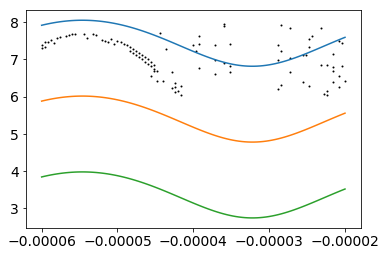

In [1882]:
sp._counter = 0
sp._iterations = 1 
# sp._coarse_frequency = params[2]
plt.plot(sp._parameter_values,
                        sp._qubit_spectrum(sp._parameter_values,
                                            *params[:-1]))
plt.plot(sp._parameter_values,
                        sp._qubit_spectrum(sp._parameter_values,
                                            *params[:-1])-params[-1])
plt.plot(sp._parameter_values,
                        sp._qubit_spectrum(sp._parameter_values,
                                            *params[:-1])-params[-1]*2)
plt.scatter(sp._points[:,0], sp._points[:,1], s=1, color="black")
loss, (chosen, chosen2, chosen3) = sp._cost_function_fine_fast(params, sp._y_scan_area_size, sp._points, True)
# loss, (chosen, chosen2, chosen3) = sp._cost_function_fine(params, sp._y_scan_area_size, sp._points, True)
# loss, chosen = sp._cost_function_coarse(params[1:], sp._y_scan_area_size, sp._points, True)


plt.scatter(chosen[:,0], chosen[:,1], s=2)
plt.scatter(chosen2[:,0], chosen2[:,1], s=2, color="C1")

plt.scatter(chosen3[:,0], chosen3[:,1], s=2, color="C2")

plt.title("Loss %.2e"%loss+", chosen %.2f points"%(len(chosen)+len(chosen2)+len(chosen3)))
plt.gcf().set_size_inches(15,10)
# plt.ylim(6.5, 7)
plt.grid()

Done: 0.00%, 0/1, [4.485e-05, -9.784e-06, 8.058e+00, 0.000e+00, 2.045e+00]2


ValueError: too many values to unpack (expected 3)

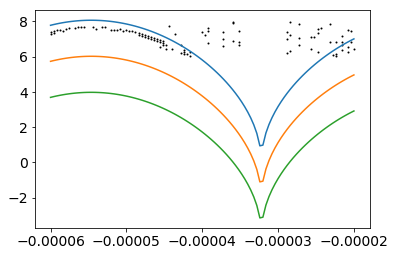

In [1886]:
sp._counter = 0
sp._iterations = 1 
# sp._coarse_frequency = params[2]
plt.plot(sp._parameter_values,
                        sp._qubit_spectrum(sp._parameter_values,
                                            *params[:-1]))
plt.plot(sp._parameter_values,
                        sp._qubit_spectrum(sp._parameter_values,
                                            *params[:-1])-params[-1])
plt.plot(sp._parameter_values,
                        sp._qubit_spectrum(sp._parameter_values,
                                            *params[:-1])-params[-1]*2)
plt.scatter(sp._points[:,0], sp._points[:,1], s=1, color="black")
loss, (chosen, chosen2, chosen3) = sp._cost_function_fine_fast(params, sp._y_scan_area_size, sp._points, True)
# loss, (chosen, chosen2, chosen3) = sp._cost_function_fine(params, sp._y_scan_area_size, sp._points, True)
# loss, chosen = sp._cost_function_coarse(params[1:], sp._y_scan_area_size, sp._points, True)


plt.scatter(chosen[:,0], chosen[:,1], s=2)
plt.scatter(chosen2[:,0], chosen2[:,1], s=2, color="C1")

plt.scatter(chosen3[:,0], chosen3[:,1], s=2, color="C2")

plt.title("Loss %.2e"%loss+", chosen %.2f points"%(len(chosen)+len(chosen2)+len(chosen3)))
plt.gcf().set_size_inches(15,10)
# plt.ylim(6.5, 7)
plt.grid()

In [1616]:
len(chosen)

61

Done: 0.00%, 0/1, [-9.78e-06, 8.06e+00, 7.16e-01, 2.04e+00]

TypeError: transmon_spectrum() takes 5 positional arguments but 6 were given

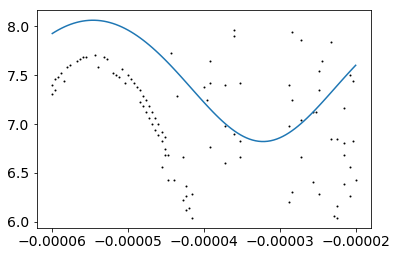

In [1884]:
sp._counter = 0
sp._iterations = 1 
# sp._coarse_frequency = params[2]
plt.plot(sp._parameter_values,
                        sp._qubit_spectrum(sp._parameter_values,
                                            *params[:-1]))
# plt.plot(sp._parameter_values,
#                         sp._qubit_spectrum(sp._parameter_values,
#                                             *params[:-1])-params[-1])
# plt.plot(sp._parameter_values,
#                         sp._qubit_spectrum(sp._parameter_values,
#                                             *params[:-1])-params[-1]*2)
plt.scatter(sp._points[:,0], sp._points[:,1], s=1, color="black")
# loss, (chosen, chosen2, chosen3) = sp._cost_function_fine_fast(params, sp._y_scan_area_size, sp._points, True)
# loss, (chosen, chosen2, chosen3) = sp._cost_function_fine(params, sp._y_scan_area_size, sp._points, True)
loss, chosen = sp._cost_function_coarse(params[1:], sp._y_scan_area_size, sp._points, True)


plt.scatter(chosen[:,0], chosen[:,1], s=2)
# plt.scatter(chosen2[:,0], chosen2[:,1], s=2, color="C1")

# plt.scatter(chosen3[:,0], chosen3[:,1], s=2)

plt.title("Loss %.2e"%loss+", chosen %.2f points"%(len(chosen)+len(chosen2)+len(chosen3)))
plt.gcf().set_size_inches(15,5)
# plt.ylim(6.5, 7)
plt.grid()

In [82]:
sp._slices

[slice(4.2269103073201834e-05, 4.399437258639375e-05, 5.750898377306389e-07),
 slice(2.9753783640192304e-06, 4.700647877211142e-06, 3.450539026383823e-07),
 slice(6.643870768864669, 12.338617142177245, 0.11389492746625152),
 slice(0.1, 0.91, 0.10125),
 slice(0.1, 0.12, 0.003999999999999998)]

In [1559]:
freqs = linspace(6, 8, 60)
ds = linspace(0.1, 1, 64)
loss = []

sp._counter = 0
sp._iterations = 60*64
for freq in freqs:
    for d in ds:
        loss.append(sp._cost_function_coarse([-6.72e-5, freq, d], 2*50e-3, sp._points))
loss = array(loss).reshape(len(freqs), -1)

Done: 99.74%, 3830/3840, [-6.72e-05, 8.00e+00, 8.71e-01], loss: 1.05e+00 , chosen points: 3


In [1872]:
loss = sp._coarse_loss[0]
ds = mgrid[sp._slices[3]]
freqs = mgrid[sp._refine_freq_slice]

In [1871]:
loss.shape

(20, 21)

In [1876]:
both_axes_extrema = []
y = array(argrelextrema(loss, less, 1, order=10)).T
x = array(argrelextrema(loss, less, 0, order=10)).T
for point in y:
    equality = (point == x).T
    equals = where(np.logical_and(*equality))[0]
    if equals.size != 0:
        both_axes_extrema.append(point)
both_axes_extrema = array(both_axes_extrema)

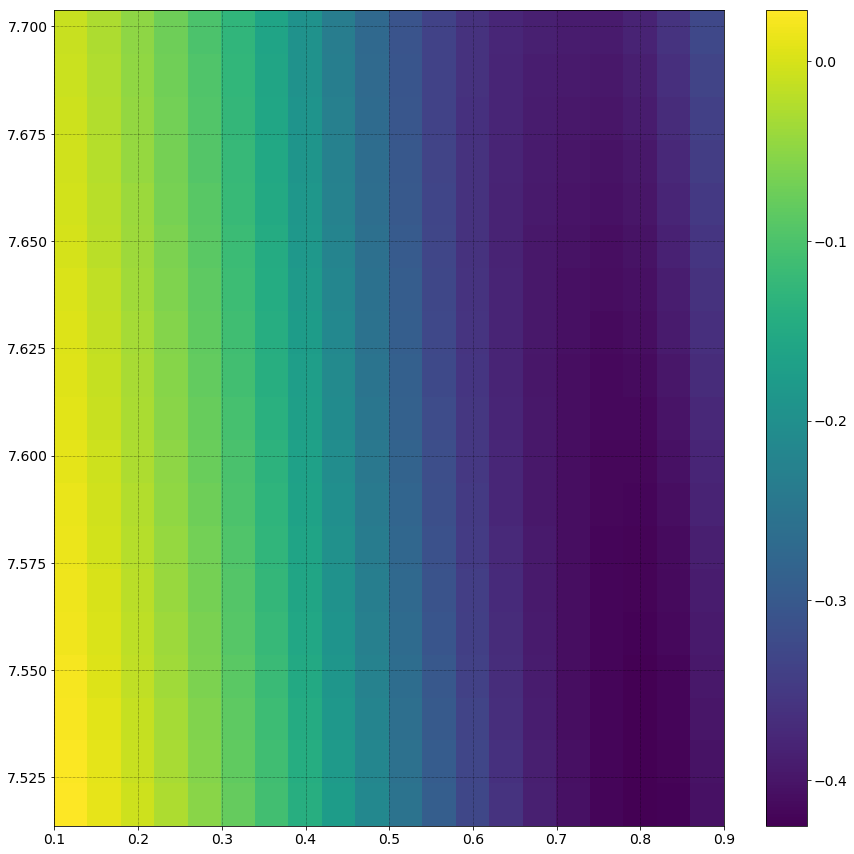

In [1878]:
# yinds, xinds = both_axes_extrema.T
# plot(ds[xinds], freqs[yinds], ".", color="red")

pcolormesh(ds, freqs, log10(loss))
plt.colorbar()
plt.gcf().set_size_inches(15,15)
plt.grid()

In [991]:
sqrt(median(diff(abs(sp._Z))**2))

0.00042701438377134595

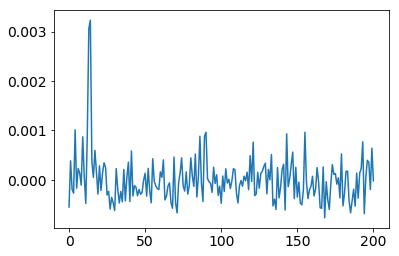

In [987]:
row = abs(sp._Z)[2] - mean(abs(sp._Z)[2])
plot(row)
# plot(diff(abs(sp._Z)[25]))

In [989]:
find_peaks(row, prominence=0.25*ptp(row))

(array([  4,   9,  14,  41,  69,  86,  90, 121, 143, 155, 179, 193]),
 {'left_bases': array([  0,   5,   0,  30,  68,  71,  71, 100, 142, 142, 168, 168]),
  'prominences': array([0.00148839, 0.00103879, 0.00377997, 0.00120444, 0.0010366 ,
         0.00131872, 0.00163282, 0.00123771, 0.00143747, 0.00157324,
         0.00119295, 0.00145625]),
  'right_bases': array([ 11,  11, 168,  71,  71,  88, 168, 142, 153, 168, 185, 194])})

In [835]:
sp._thresh_otsu

0.018958436822282355

In [728]:
from skimage import feature

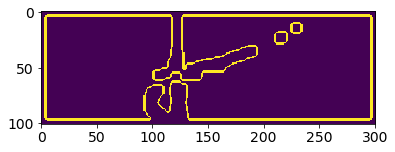

In [738]:
imshow(feature.canny(abs(sp._Z)<2*threshold_otsu(abs(sp._Z))))

### Symmetry detection

In [1023]:
points = sp._points

(-7.075052835806413e-05, -4.9087359077931525e-05)

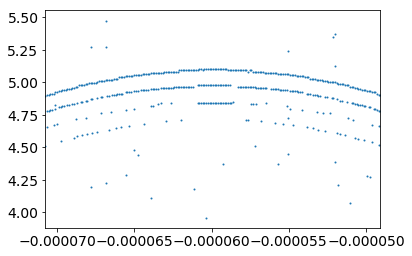

In [1042]:
plt.scatter(points[:,0], points[:,1], s=1)
plt.xlim(points[:,0][0], points[:,0][-1])

In [1143]:
mirror_vertical = -5.5e-5

In [1144]:
left_indcs = points[:,0] < mirror_vertical
left_points_x, left_points_y = points[left_indcs].T 
right_indcs = points[:,0] > mirror_vertical
right_points_x, right_points_y = points[right_indcs].T 

mirrored_x_left = mirror_vertical+(-left_points_x+mirror_vertical)

In [1079]:
left_points_x[0]-0

-7.075052835806413e-05

In [1145]:
points_mirrored = array([mirrored_x_left, left_points_y]).T

In [1146]:
points_mirrored.shape

(342, 2)

In [1147]:
sqrt(min(sum((points_mirrored - points[right_indcs][0])**2, axis=1)))

9.94620328239631e-06

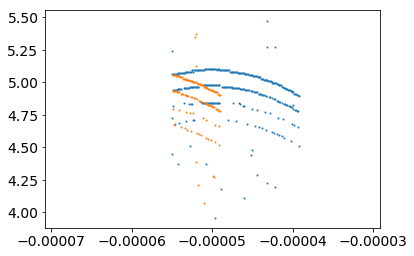

In [1149]:
# plt.scatter(points[:,0], points[:,1], s=1)
plt.xlim(points[:,0][0], points[:,0][-1]+2e-5)
scatter(mirrored_x_left, left_points_y, s=1)
scatter(right_points_x, right_points_y, s=1)


In [1175]:
def loss(mirror_coord, points):
    left_indcs = points[:,0] < mirror_coord
    left_points_x, left_points_y = points[left_indcs].T 
    right_indcs = points[:,0] > mirror_coord
    right_points_x, right_points_y = points[right_indcs].T 
    
    
    if len(left_points_x) == 0 or len(right_points_x) == 0:
        return 100
    
    mirrored_x_left = mirror_coord+(-left_points_x+mirror_coord)
    mirrored_points = array([mirrored_x_left, left_points_y]).T
    right_points = points[right_indcs]
    losses = []
    if len(right_points)<len(points_mirrored):
        for mirrored_point in mirrored_points:
            distances = sum((right_points - mirrored_point)**2, axis=1)
            closest_idx = argmin(distances)
            losses.append(sqrt(distances[closest_idx]))
    else:
        for right_point in right_points:
            distances = sum((mirrored_points - right_point)**2, axis=1)
            closest_idx = argmin(distances)
            losses.append(sqrt(distances[closest_idx]))
    return sum(losses)/len(losses)

In [1176]:
losses = []
for mirror_axis in sp._points[:,0]:
    losses.append(loss(mirror_axis, sp._points))

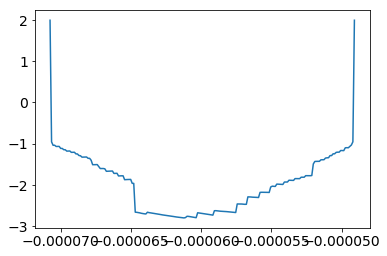

In [1177]:
plot(sp._points[:,0], log10(losses))